### 파이썬으로 공부하는 미적분과 최적화

#### 데이터 분석에서 많이 사용되는 함수들
- polynomial
- exponential
- log

### 지수함수(Exponential Function)

In [1]:
np.e

2.718281828459045

In [3]:
np.exp(0)

1.0

In [4]:
np.exp(2+3),np.exp(2)*np.exp(3)

(148.4131591025766, 148.4131591025766)

## 지수함수 특성
- 양수( e )를 거듭제곱한 값이므로 항상 양수이다.
- x=0 일 때 1이 된다.
- x 가 양의 무한대로 가면( x→ ∞), 양의 무한대로 다가간다.
- x 가 음의 무한대로 가면( x→− ∞), 0으로 다가간다.
- x1>x2 이면  expx1>expx2 이다.

- NumPy에서는 `e`명령으로 오일러 수를, `exp` 명령으로 지수 함수를 계산한다. 

<IPython.core.display.Javascript object>


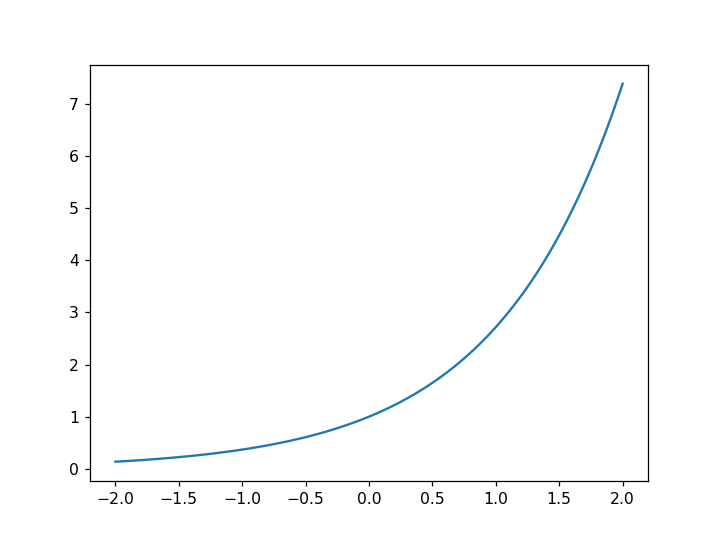

In [3]:
import matplotlib.pyplot as plt
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.plot(xx, yy)
plt.show()

### 로그 함수(Log Function)

- 지수함수와 역함수 관계이다.

In [8]:
np.log(10)

2.302585092994046

##### 로그 함수는 다음과 같은 특징을 가진다.
- x 값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
- x>1  이면 양수가 된다.
- x=1 일 때  y=0 이 된다.
- 0<x<1  이면 음수가 된다.
- x1>x2 이면  logx1>logx2 이다

<IPython.core.display.Javascript object>


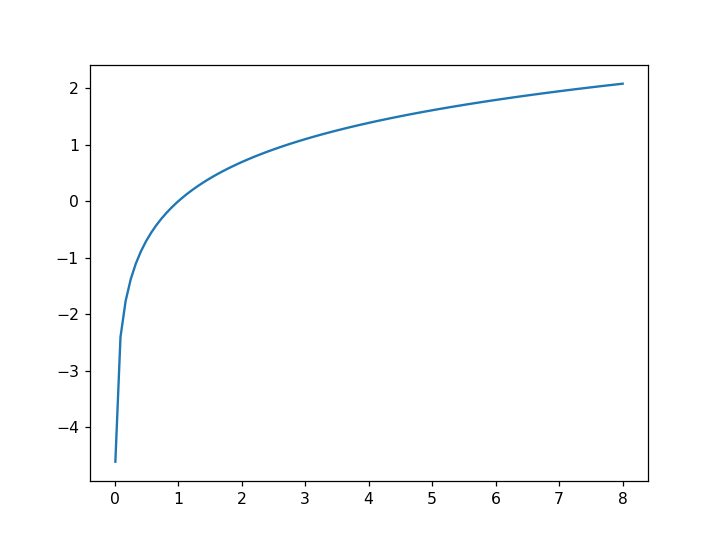

In [4]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.plot(xx, yy)
plt.show()

#### 로그 함수의 성질 1: 로그 함수는 곱하기를 더하기로 변환한다.
- ex) log(12)=log(2*2*3)=log2+log2+log3

#### 다음 세 가지 특성은 매우 중요하다!
- log(x1⋅x2)=logx1+logx2
- log(∏i xi)=∑i (logxi)
- logxn=nlogx

##### 로그 함수의 성질 2: 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.

- arg max_x f(x) = arg max_x log(f(x))

##### 로그 함수의 성질 3: 로그 함수는 0부터 1사이의 작은 값을 확대시켜 보여준다.
- 0과 1사이에 있는 작은 값을 더 확실하게 비교할 수 있도록 한다.
- 0부터 1사이의 구간을 음의 무한대부터 0까지로 확장시켜주기 때문이다.

<IPython.core.display.Javascript object>


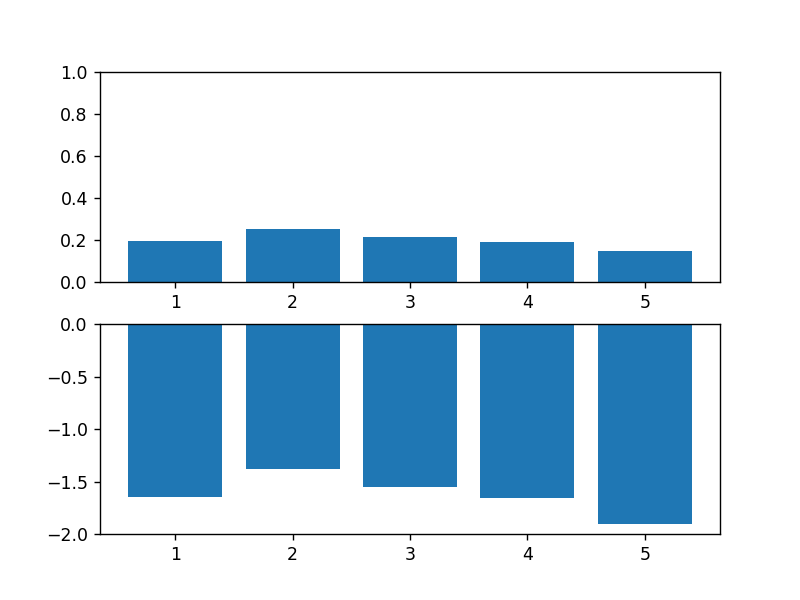

In [10]:
np.random.seed(0)
x = np.random.rand(5)
x = x / x.sum()

plt.subplot(211)
plt.bar(range(1, 6), x)
plt.ylim(0, 1)

plt.subplot(212)
plt.bar(range(1, 6), np.log(x))

plt.show()

### 다변수 함수(multivariate function)
- 복수의 입력 변수를 가지는 함수(multiple arguments)-- `z=f(x,y)`

In [32]:
import sympy
sympy.init_printing(use_latex='mathjax')
x,y,z=sympy.symbols('x y z')
def f(x,y):
    return 2*x**2 + 6*x*y + 7*y**2 -26*x -54*y + 107
z=f(x,y)
z

   2                     2             
2⋅x  + 6⋅x⋅y - 26⋅x + 7⋅y  - 54⋅y + 107

- 위의 multivariate function을 surface plot, contour plot으로 나타낼 수 있다.

### 분리가능 다변수 함수
- 다변수 함수 중에는 단변수 함수의 곱으로 표현 가능한 다변수 함수도 있다.
- f(x,y)=f_1(x) * f_2(y)

In [40]:
g=sympy.exp(-x**2 - 16*y**2)
g

    2       2
 - x  - 16⋅y 
ℯ            

In [39]:
z=sympy.exp(-x**2)*sympy.exp(-16*y**2)
z

   2       2
 -x   -16⋅y 
ℯ   ⋅ℯ      

- 위의 두 함수는 지수함수의 곱은 지수의 곱으로 변환이 가능하다는 특성으로 인해 분리가능 다변수 함수가 된다.

### 다변수 다출력 함수
- 어떤 함수는 multiple input variable, multiple output variable을 가질 수 있다.

#### softmax function
- 다변수 다출력 함수
    - 1. 모든 원소는 0<=y_i<=1
    - 2. 모든 원소의 합은 1
    - 3. 입력 원소의 크기 순서와 출력 원소의 크기 순서가 같다.
    
- 위와 같은 특성으로 인해 Classification model에서 사용된다.

In [44]:
import numpy as np
def softmax(x, w):  # x는 1차원 배열, w는 가중치 벡터
    e = np.exp(w * x)
    return np.exp(w * x) / e.sum()

x = [2.0, 1.0, 0.5]
y = softmax(x, np.ones(3))
y
#2,1,0.5 input variable의 크기 순으로 그대로 유지되면서 outcome이 return된다.

array([0.62853172, 0.2312239 , 0.14024438])

In [45]:
np.sum(y)

1.0

In [48]:
# 위의 softmax 함수에서는 가중치를 일벡터를 넣었지만 
# 가중치를 증가시키면 값들의 격차가 더 커진다!
x=[2.0,1.0,0.5]
y=softmax(x,4*np.ones(3))
y


array([0.97962921, 0.01794253, 0.00242826])

## SymPy를 사용한 함수 미분

In [17]:
from scipy.misc import derivative

In [19]:
def f(x):
    return x**3 - 3 * x**2 + x

<IPython.core.display.Javascript object>


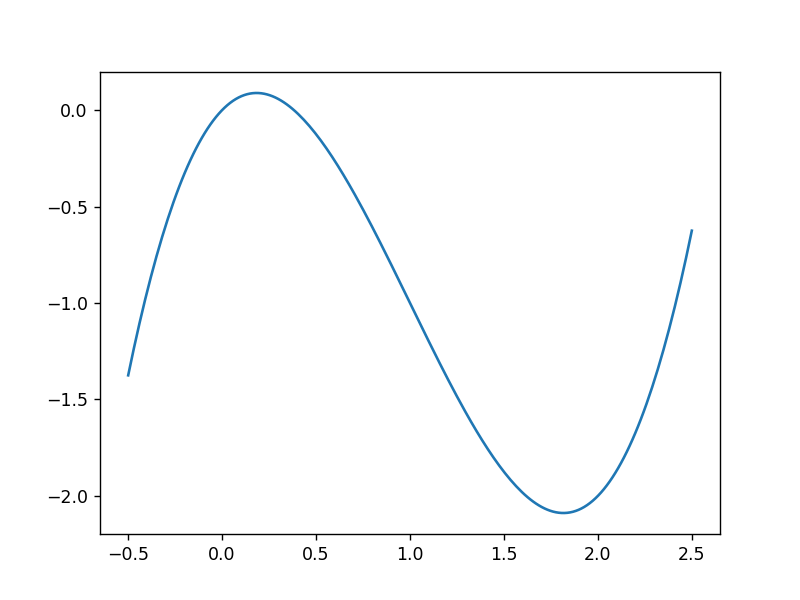

In [37]:
import matplotlib.pyplot as plt
x=np.linspace(-0.5,2.5,200)
y=f(x)
plt.plot(x,y)
plt.show()

In [27]:
derivative(f,2.5,dx=1e-6)

4.749999999553722

### Sympy
- sympy는 symbolic operation을 지원하는 Python package이다. symbolic operation이란 사람이 연필로 계산하는 미/적분과 같은 동일한 형태의 연산을 의미한다.
- symbolic operation의 symbolic variable은 어떤 수를 Latex기호로 쓴 것을 넘어서 그 수에 어떠한 숫자도 대입되지 않고  `symbol`명령어를 통해 이 기호가 symbol임을 알려주고 객체를 선언해준다. `x=sympy.symbols(~)`이런 식으로 말이다. 이 명령어를 통해 x는 객체, 또한, `Symbol` 클래스의 자료형이 된다.

In [50]:
import sympy
#Jupyter 노트북에서 수학식의 LaTex 표현을 위해 필요하다
sympy.init_printing(use_latex='mathjax')

In [52]:
x=sympy.symbols('x')
x

x

In [53]:
type(x)

sympy.core.symbol.Symbol

In [54]:
f=x*sympy.exp(x)
f
#np.exp는 ()안에 숫자를 넣어주어야 한다. sympy의 exp를 사용해야 한다.

   x
x⋅ℯ 

In [55]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [57]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [58]:
x,mu,sigma=sympy.symbols('x mu sigma')
f=sympy.exp((x-mu)**2/sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [60]:
x,y=sympy.symbols('x y')
x,y

(x, y)

In [63]:
f=x**2+2*x*y+y**2
f
sympy.diff(f,x)#x에 대한 partial differnetiation

2⋅x + 2⋅y

In [64]:
x,mu,sigma=sympy.symbols('x mu sigma')
f=sympy.exp((x-mu)**2/sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [67]:
sympy.diff(f,x,x)
sympy.simplify(sympy.diff(f,x,x))

                            2
                     (μ - x) 
                     ────────
                         2   
  ⎛ 2            2⎞     σ    
2⋅⎝σ  + 2⋅(μ - x) ⎠⋅ℯ        
─────────────────────────────
               4             
              σ              

### 연습문제 5번

In [68]:
x,k,a,b=sympy.symbols('x k a b')
x,k,a,b

(x, k, a, b)

In [69]:
f_1=x**3-1
f_1

 3    
x  - 1

In [70]:
f_2=sympy.log(x**2-3*k)
f_2

   ⎛        2⎞
log⎝-3⋅k + x ⎠

In [71]:
f_3=sympy.exp(a*x**b)
f_3

    b
 a⋅x 
ℯ    

In [81]:
sympy.simplify(sympy.diff(f_1,x))

   2
3⋅x 

In [80]:
sympy.simplify(sympy.diff(f_2,x))

   2⋅x   
─────────
        2
-3⋅k + x 

In [79]:
sympy.simplify(sympy.diff(f_3,x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

### 연습문제 6번

In [83]:
x,y=sympy.symbols('x y')
x,y

(x, y)

In [84]:
f_4=sympy.exp(x**2+2*y**2)
f_4

  2      2
 x  + 2⋅y 
ℯ         

In [85]:
sympy.simplify(sympy.diff(f_4,x))

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [86]:
sympy.simplify(sympy.diff(f_4,y))

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [87]:
sympy.simplify(sympy.diff(f_4,x,x))

             2      2
⎛   2    ⎞  x  + 2⋅y 
⎝4⋅x  + 2⎠⋅ℯ         

In [89]:
sympy.simplify(sympy.diff(f_4,x,y))

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [90]:
sympy.simplify(sympy.diff(f_4,y,x))

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [95]:
sympy.simplify(sympy.diff(f_4,y,y))

              2      2
⎛    2    ⎞  x  + 2⋅y 
⎝16⋅y  + 4⎠⋅ℯ         

In [97]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [68]:
import sympy
#Jupyter 노트북에서 수학식의 LaTex 표현을 위해 필요하다
sympy.init_printing(use_latex='mathjax') 
x=sympy.symbols('x')
f=3*x**2
f

   2
3⋅x 

In [107]:
F=sympy.integrate(f)
F

 3
x 

In [112]:
(F.subs(x,2) - F.subs(x,0)).evalf()

8.00000000000000

### 적분(Intergration)
- 미분과 반대되는 개념으로써 부정적분(indefinite integral)과 정적분(definite integral)이 있다.

In [72]:
x,y,z=sympy.symbols('x y z')
y=3*x**2
y

   2
3⋅x 

In [62]:
sympy.Integral(y) #indefinite integral

⌠        
⎮    2   
⎮ 3⋅x  dx
⌡        

In [60]:
sympy.integrate(y)

 3
x 

In [80]:
x,y,z=sympy.symbols('x y z')
z=1+x*y
z

x⋅y + 1

In [82]:
sympy.Integral(z,x) #뒤에 상수항이 C(x)가 된다.

⌠             
⎮ (x⋅y + 1) dx
⌡             

In [79]:
sympy.integrate(z,x) 

 2      
x ⋅y    
──── + x
 2      

- 다차 도함수와 다중 적분

In [83]:
z=x*y*sympy.exp(x**2+y**2)
z

      2    2
     x  + y 
x⋅y⋅ℯ       

In [85]:
sympy.Integral(z,x,y)

⌠ ⌠                   
⎮ ⎮       2    2      
⎮ ⎮      x  + y       
⎮ ⎮ x⋅y⋅ℯ        dx dy
⌡ ⌡                   

In [86]:
sympy.integrate(z,x,y)

  2    2
 x  + y 
ℯ       
────────
   4    

## 정적분
- 미적분학의 기본 정리(Fundamental Theorem of Calculus)
    - 부정적분으로 구한 함수 F(x)를 이용하면 정적분의 값을 구할 수 있다.

#### Python package를 이용해 정적분을 구하는 방법:
   - 1: Sympy로 부정적분을 하고 미적분학의 기본정리를 이용
   - 2: 함수의 면적부분을 잘게 쪼개어 구하는 numerical integration

- 1: Sympy로 부정적분을 하고 미적분학의 기본정리를 이용        

In [89]:
x,y=sympy.symbols('x y')
f=x**3-3*x**2+x+6
f

 3      2        
x  - 3⋅x  + x + 6

In [91]:
F=sympy.integrate(f) #indefinite integral
F

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [95]:
(F.subs(x,2)-F.subs(x,0)).evalf()
#subs-> substitute, evalf->evaluate the function

10.0000000000000

- 2: 함수의 면적부분을 잘게 쪼개어 구하는 numerical integration
    - Scipy의 integrate 서브패키지의 `quad`(적분), `dbquad`(이중적분), `tplquad`(삼중적분) 등은 수치 적분을 이용하여 정적분의 값을 계산한다.

In [99]:
import scipy as sp
def f(x):
    return x**3 - 3*x**2 + x + 6
sp.integrate.quad(f,0,2) #정적분(numberical integrate)
#수치적 정적분 결과값의 두 번째 인자는 오차의 상한값을 의미한다.(almost Zero)

(10.0, 1.1102230246251565e-13)

### 다변수 정적분
   - 두 변수를 이중 적분하는 경우 - Scipy integrate 서브패키지의 `dblquad` 사용
   - 하나의 변수로 단일 적분하는 경우
  

`dblquad(func, a, b, gfun, hfun)`

In [101]:
x,y,z=sympy.symbols('x y z')
z=sympy.exp(-x*y)/y**2

 -x⋅y
ℯ    
─────
   2 
  y  